## Machine Learning - Desafío 8, Random Forest
#### Gustavo Morales, G10 - 29.Ene.2020, (Miércoles Semana 4)

### **Ejercicio 1: Preparar el ambiente de trabajo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pickle
import gc

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')

In [3]:
df.sample(10, random_state=42)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1357,Two_Story_1945_and_Older,Residential_Medium_Density,0,5100,Pave,Gravel,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,6,2008,WD,Normal,161000,-93.621065,42.029038
2367,Two_Story_PUD_1946_and_Newer,Residential_Medium_Density,21,1890,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,7,2006,WD,Normal,116000,-93.627103,42.051798
2822,Two_Story_1946_and_Newer,Residential_Low_Density,62,7162,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,5,2006,WD,Normal,196500,-93.672379,42.018990
2126,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,8070,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,None,0,8,2007,WD,Normal,123600,-93.692415,42.019028
1544,One_Story_1945_and_Older,Residential_Medium_Density,50,7000,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,None,0,7,2008,WD,Normal,126000,-93.628409,42.022607
2415,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,102,11660,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,7,2006,New,Partial,174190,-93.644627,42.063031
2227,One_Story_PUD_1946_and_Newer,Residential_Medium_Density,35,3907,Pave,No_Alley_Access,Slightly_Irregular,Bnk,AllPub,Inside,...,No_Fence,None,0,3,2007,WD,Normal,200000,-93.645785,42.009321
410,Two_Story_PUD_1946_and_Newer,Residential_Low_Density,24,2280,Pave,No_Alley_Access,Regular,Lvl,AllPub,FR2,...,No_Fence,None,0,7,2009,WD,Normal,148500,-93.624748,42.050705
761,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,50,4280,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,No_Fence,None,0,9,2009,WD,Normal,88750,-93.659205,42.032681
436,Two_Story_1946_and_Newer,Residential_Low_Density,59,23303,Pave,No_Alley_Access,Irregular,Lvl,AllPub,CulDSac,...,No_Fence,None,0,6,2009,WD,Family,409900,-93.656737,42.060353


In [4]:
df.info(max_cols=80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Columns: 81 entries, MS_SubClass to Latitude
dtypes: float64(2), int64(33), object(46)
memory usage: 1.8+ MB


### **Ejercicio 2: Importación de archivos serializados**

In [5]:
gus_model = pickle.load(open('gus-morales_actividad07_best-model.pkl', 'rb'))
Xg_train = pickle.load(open('gus-morales_actividad07_xtrain.pkl', 'rb'))
Xg_test = pickle.load(open('gus-morales_actividad07_xtest.pkl', 'rb'))
yg_train = pickle.load(open('gus-morales_actividad07_ytrain.pkl', 'rb'))
yg_test = pickle.load(open('gus-morales_actividad07_ytest.pkl', 'rb'))

In [6]:
gus_model

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.

In [7]:
edu_model = pickle.load(open('eduardo-lopez-actividad07-model.sav', 'rb'))
Xe_train = pickle.load(open('eduardo-lopez-actividad07-X_train.sav', 'rb'))
Xe_test = pickle.load(open('eduardo-lopez-actividad07-X_test.sav', 'rb'))
ye_train = pickle.load(open('eduardo-lopez-actividad07-y_train.sav', 'rb'))
ye_test = pickle.load(open('eduardo-lopez-actividad07-y_test.sav', 'rb'))

In [8]:
ye_pred = edu_model.predict(Xe_test)
yg_pred = gus_model.predict(Xg_test)

In [9]:
dict_edu = {
    'mse': mean_squared_error(ye_test, ye_pred).round(2),
    'mae': median_absolute_error(ye_test, ye_pred).round(2),
    'r2': r2_score(ye_test, ye_pred).round(2)
}

In [10]:
dict_gus = {
    'mse': mean_squared_error(yg_test, yg_pred).round(2),
    'mae': median_absolute_error(yg_test, yg_pred).round(2),
    'r2': r2_score(yg_test, yg_pred).round(2)
}

In [11]:
d1 = pd.DataFrame.from_dict(dict_edu, orient='index', columns=['edu_dtr'])
d2 = pd.DataFrame.from_dict(dict_gus, orient='index', columns=['gus_dtr'])
pd.concat([d1, d2], axis=1)

,edu_dtr,gus_dtr
mse,1.329358e+09,1.937903e+09
mae,1.537500e+04,1.543344e+04
r2,7.700000e-01,7.100000e-01


**(R)** Son métricas muy similares, lo cual es esperable dado que partimos de la misma base de datos original.

### **Ejercicio 3: Evaluación Random Forest**

In [12]:
gus_rf_model = RandomForestRegressor(random_state=42).fit(Xg_train, yg_train)

In [13]:
yg_rf_pred = gus_rf_model.predict(Xg_test)
dict_rf_gus = {
    'mse': mean_squared_error(yg_test, yg_rf_pred).round(2),
    'mae': median_absolute_error(yg_test, yg_rf_pred).round(2),
    'r2': r2_score(yg_test, yg_rf_pred).round(2)
}

In [14]:
d3 = pd.DataFrame.from_dict(dict_rf_gus, orient='index', columns=['gus_rfr'])
pd.concat([d1, d2, d3], axis=1)

,edu_dtr,gus_dtr,gus_rfr
mse,1.329358e+09,1.937903e+09,1.009614e+09
mae,1.537500e+04,1.543344e+04,1.305838e+04
r2,7.700000e-01,7.100000e-01,8.500000e-01


**(R)** Según estas métricas, todos los modelos tienen un desempeño similar.

### **Ejercicio 4: Evaluación Random Forest**

In [15]:
SEED = 42
n_estimators = range(30, 1000, 50)
max_features = [None, 'sqrt', 'log2']
oob_none, oob_sqrt, oob_log2 = [], [], []

In [16]:
for i,n in enumerate(n_estimators):
    print('(%d) n_estimators = %d'%(i+1,n))

    rf_none = RandomForestRegressor(
        n_estimators = n,
        max_features = max_features[0],
        oob_score = True,
        random_state = SEED
    ).fit(Xg_train, yg_train)

    rf_sqrt = RandomForestRegressor(
        n_estimators = n,
        max_features = max_features[1],
        oob_score = True,
        random_state = SEED
    ).fit(Xg_train, yg_train)

    rf_log2 = RandomForestRegressor(
        n_estimators = n,
        max_features = max_features[2],
        oob_score = True,
        random_state = SEED
    ).fit(Xg_train, yg_train)

    oob_none.append(1 - rf_none.oob_score_)
    oob_sqrt.append(1 - rf_sqrt.oob_score_)
    oob_log2.append(1 - rf_log2.oob_score_)

    gc.collect()

(1) n_estimators = 30
(2) n_estimators = 80
(3) n_estimators = 130
(4) n_estimators = 180
(5) n_estimators = 230
(6) n_estimators = 280
(7) n_estimators = 330
(8) n_estimators = 380
(9) n_estimators = 430
(10) n_estimators = 480
(11) n_estimators = 530
(12) n_estimators = 580
(13) n_estimators = 630
(14) n_estimators = 680
(15) n_estimators = 730
(16) n_estimators = 780
(17) n_estimators = 830
(18) n_estimators = 880
(19) n_estimators = 930
(20) n_estimators = 980


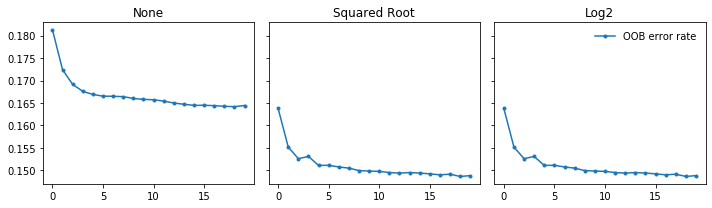

In [17]:
plt.rcParams['figure.figsize'] = (10,3)
fig, axs = plt.subplots(1, 3, sharey=True)
axs[0].plot(oob_none, '.-', label = 'OOB error rate')
axs[0].set_title('None')
axs[1].plot(oob_sqrt,'.-',  label = 'OOB error rate')
axs[1].set_title('Squared Root')
axs[2].plot(oob_log2, '.-', label = 'OOB error rate')
axs[2].set_title('Log2')
axs[2].legend(frameon=False)
plt.tight_layout()

### **Ejercicio 5: Refactorice el modelo**

In [18]:
BEST_N = 430
rf_log2_best = RandomForestRegressor(
        n_estimators = BEST_N,
        max_features = 'log2',
        oob_score = True,
        random_state = SEED
    ).fit(Xg_train, yg_train)

In [19]:
yg_rfbest_pred = rf_log2_best.predict(Xg_test)
dict_rfbest = {
    'mse': mean_squared_error(yg_test, yg_rfbest_pred).round(2),
    'mae': median_absolute_error(yg_test, yg_rfbest_pred).round(2),
    'r2': r2_score(yg_test, yg_rfbest_pred).round(2)
}

In [20]:
d4 = pd.DataFrame.from_dict(dict_rfbest, orient='index', columns=['rfr_log2_best'])
pd.concat([d1, d2, d3, d4], axis=1)

,edu_dtr,gus_dtr,gus_rfr,rfr_log2_best
mse,1.329358e+09,1.937903e+09,1.009614e+09,9.362000e+08
mae,1.537500e+04,1.543344e+04,1.305838e+04,1.218838e+04
r2,7.700000e-01,7.100000e-01,8.500000e-01,8.600000e-01


**(R)** Vemos que efectivamente el modelo con mejor desempeño es el último: tiene mejor MSE, mejor MAE, y mejor R$^2$.